In [73]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

caminhoArquivo = ('./Arquivos/dados-satisfação.xlsx')
df = pd.read_excel(caminhoArquivo, sheet_name='treino')


df['Elogio a Instituição'] = df['Elogio a Instituição'].replace('SIM',1)
df['Elogio a Instituição'] = df['Elogio a Instituição'].replace('NÃO',0)
df['Elogio quanto ao app'] = df['Elogio quanto ao app'].replace('SIM',1)
df['Elogio quanto ao app'] = df['Elogio quanto ao app'].replace('NÃO',0)
df['Elogio quanto ao app'] = df['Elogio quanto ao app'].replace('NAO',0)
df['Reclamação quanto ao app'] = df['Reclamação quanto ao app'].replace('SIM',1)
df['Reclamação quanto ao app'] = df['Reclamação quanto ao app'].replace('NÃO',0)
df['Reclamação a Instituição'] = df['Reclamação a Instituição'].replace('SIM',1)
df['Reclamação a Instituição'] = df['Reclamação a Instituição'].replace('NÃO',0)
df['Não Classificável'] = df['Não Classificável'].replace('SIM',1)
df['Não Classificável'] = df['Não Classificável'].replace('NÃO',0)


In [74]:
df['Elogio quanto ao app'].drop_duplicates()

0     1
13    0
Name: Elogio quanto ao app, dtype: int64

In [75]:


# Converter os dados para números
df['Elogio a Instituição'] = df['Elogio a Instituição'].astype(int)
df['Elogio quanto ao app'] = df['Elogio quanto ao app'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8702 entries, 0 to 8701
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Instituição               8702 non-null   object        
 1   Comentario                8698 non-null   object        
 2   Data                      8702 non-null   datetime64[ns]
 3   Classificação             8702 non-null   int64         
 4   Elogio quanto ao app      8702 non-null   int32         
 5   Reclamação quanto ao app  8702 non-null   int64         
 6   Elogio a Instituição      8702 non-null   int32         
 7   Reclamação a Instituição  8702 non-null   int64         
 8   Não Classificável         8702 non-null   int64         
dtypes: datetime64[ns](1), int32(2), int64(4), object(2)
memory usage: 544.0+ KB


In [76]:
# Substituir os valores antigos pelo novo
df['Classificação'] = df['Classificação'].replace(2,-1)
df['Classificação'] = df['Classificação'].replace(1,-1)
df['Classificação'] = df['Classificação'].replace(5,1)
df['Classificação'] = df['Classificação'].replace(4,1)
df['Classificação'] = df['Classificação'].replace(3,0)

In [77]:
# Criando um dataframe
# Calcular a média de classificação por  instituição
df_classificacao = df.groupby(['Instituição'])['Classificação'].agg('mean').reset_index()
df_classificacao['Classificação'] = df_classificacao['Classificação'] *100
df_classificacao

,Instituição,Classificação
0,Banco Bradesco,68.236646
1,Banco Itau,56.954023
2,Banco do Brasil,78.160920
3,Caixa Econômica Federal,42.413793
4,Nubank,58.529581


In [78]:
# Multiplicando os valores da coluna por 100
# df_classificacao = (df_classificacao * 100)
# df_classificacao


c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


<Axes: xlabel='Instituição', ylabel='Classificação'>

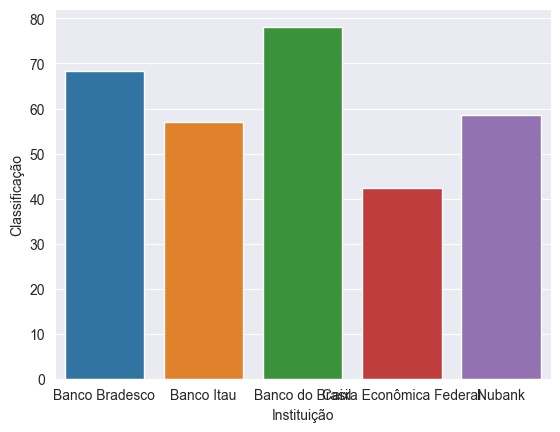

In [79]:
# Criando gráfico
sns.barplot(x = df_classificacao['Instituição'], y = df_classificacao['Classificação'])
